
#### Data Science Job Salaries Dataset contains 11 columns, each are:

- work_year: The year the salary was paid.
- experience_level: The experience level in the job during the year
- employment_type: The type of employment for the role
- job_title: The role worked in during the year.
- salary: The total gross salary amount paid.
- salary_currency: The currency of the salary paid as an ISO 4217 currency code.
- salaryinusd: The salary in USD
- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- remote_ratio: The overall amount of work done remotely
- company_location: The country of the employer's main office or contracting branch
- company_size: The median number of people that worked for the company during the year

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
ds_salaries = pd.read_csv('ds_salaries.csv')

In [4]:
ds_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Descriptive analysis

In [5]:
def des_anal(df):
    print("----------------------------Shape----------------------------------")
    print(f'{df.shape}\n\n')
    print("----------------------------Columns----------------------------------")
    print(f'{df.columns}\n\n')
    print("----------------------------Info----------------------------------")
    print(f'{df.info()}\n\n')
    print("----------------------------Descriptive----------------------------------")
    print(f'{df.describe([0.25,0.5,0.75,0.99])}\n\n')
    print("----------------------------Null values----------------------------------")
    print(f'{df.isnull().sum()}\n\n')
    print("----------------------------Unique Values----------------------------------")
    print(f'{df.nunique()}\n\n')

In [6]:
des_anal(ds_salaries)

----------------------------Shape----------------------------------
(3755, 11)


----------------------------Columns----------------------------------
Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


----------------------------Info----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employe

In [7]:
ds_salaries['experience_level']=ds_salaries['experience_level'].replace('SE','Senior level')
ds_salaries['experience_level']=ds_salaries['experience_level'].replace('MI','intermediate level')
ds_salaries['experience_level']=ds_salaries['experience_level'].replace('EN','Entry level')
ds_salaries['experience_level']=ds_salaries['experience_level'].replace('EX','Executive level')

In [8]:
ds_salaries['employment_type']=ds_salaries['employment_type'].replace('FT','Full Time')
ds_salaries['employment_type']=ds_salaries['employment_type'].replace('CT','Contract')
ds_salaries['employment_type']=ds_salaries['employment_type'].replace('FL','Freelance')
ds_salaries['employment_type']=ds_salaries['employment_type'].replace('PT','Part Time')

In [9]:
sns.set_style('darkgrid')

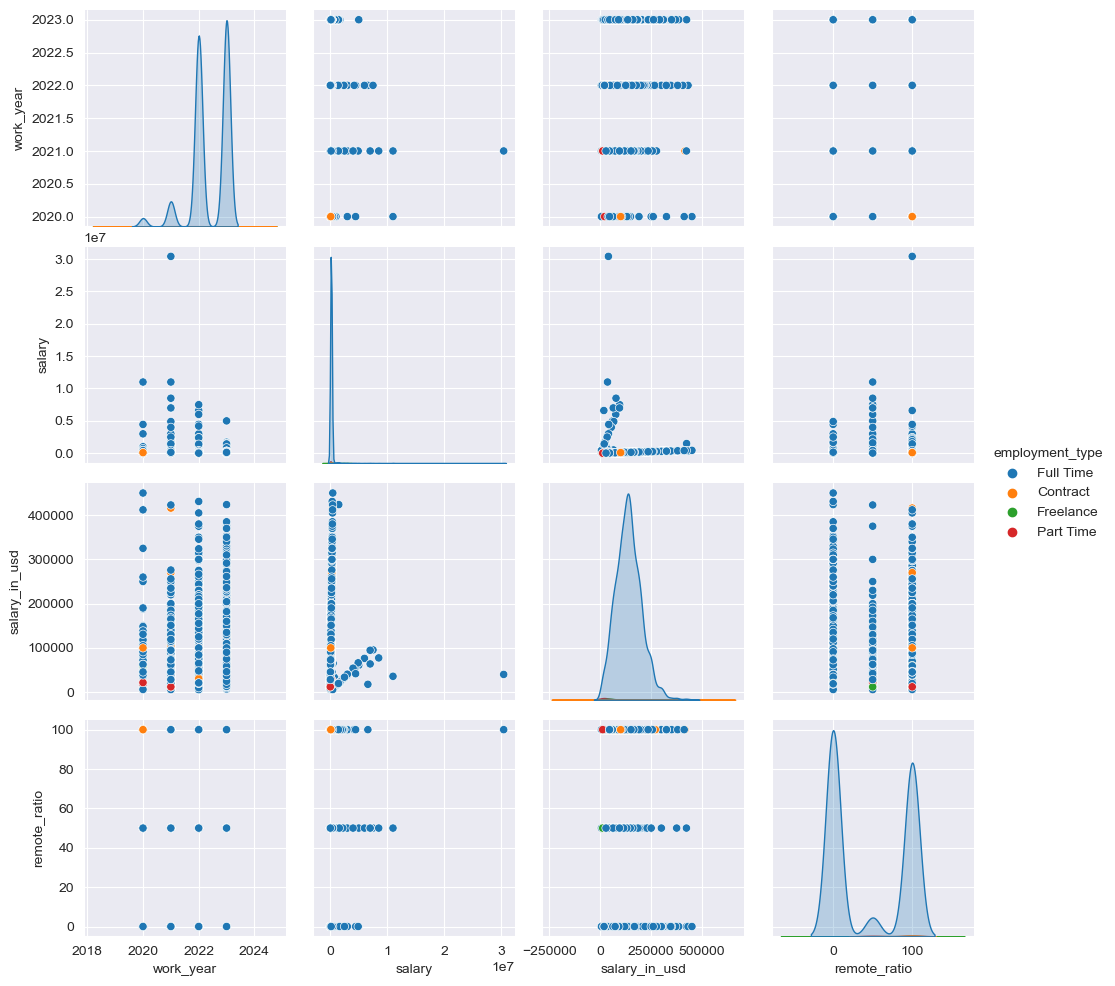

In [10]:
sns.pairplot(ds_salaries,hue='employment_type')

#### TOP 10 MOST COMMON ROLES IN DS FIELD

In [11]:
top10=ds_salaries['job_title'].value_counts().head(10)

In [12]:
top10.index

Index(['Data Engineer', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Analytics Engineer', 'Data Architect',
       'Research Scientist', 'Data Science Manager', 'Applied Scientist',
       'Research Engineer'],
      dtype='object')

In [13]:
top10.values

array([1040,  840,  612,  289,  103,  101,   82,   58,   58,   37])

In [14]:
d = {'jobtittle': top10.index, 'count': top10.values}
top10_df = pd.DataFrame(data=d)

In [15]:
top10_df

,jobtittle,count
0,Data Engineer,1040
1,Data Scientist,840
2,Data Analyst,612
3,Machine Learning Engineer,289
4,Analytics Engineer,103
5,Data Architect,101
6,Research Scientist,82
7,Data Science Manager,58
8,Applied Scientist,58
9,Research Engineer,37


<AxesSubplot:xlabel='jobtittle', ylabel='count'>

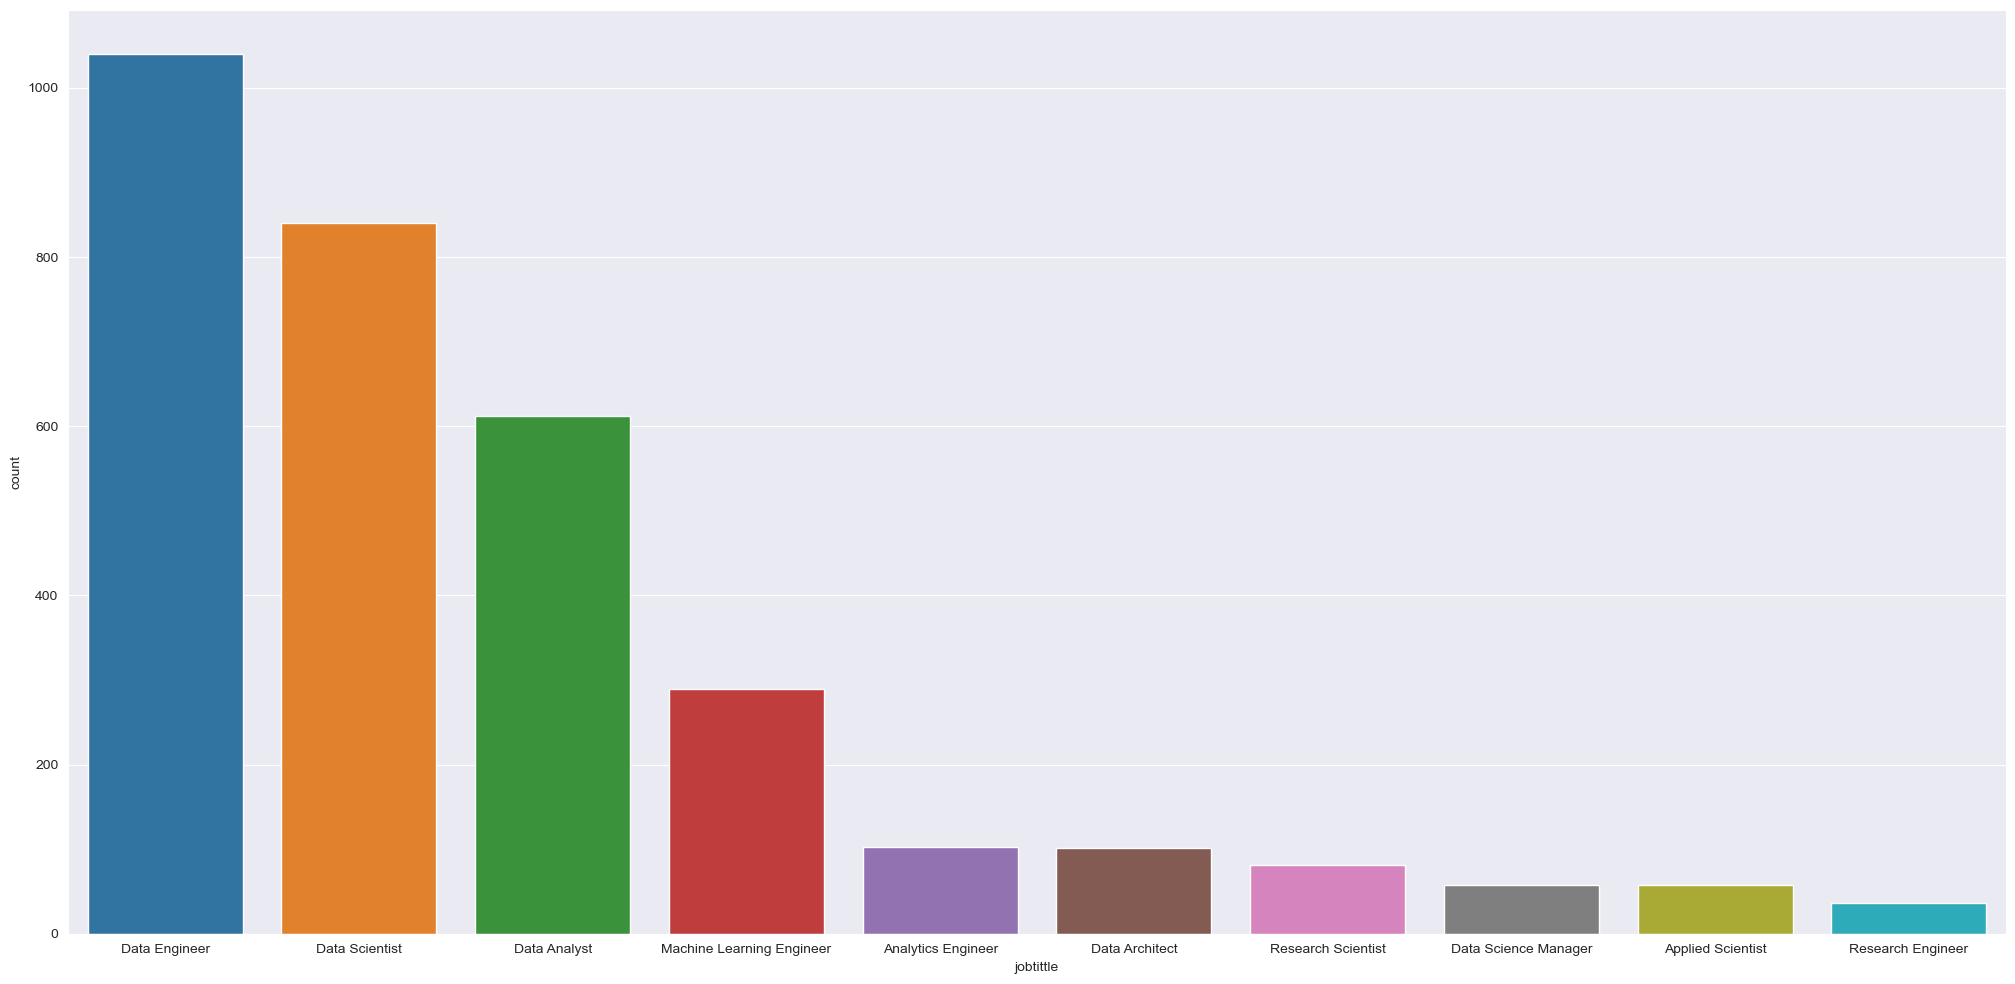

In [16]:
plt.figure(figsize=(25,12))
sns.barplot(x='jobtittle',y='count',data=top10_df)

### Mean Salary based on job Title, experience level and employment type

In [17]:
ds_salaries['salary_in_usd'].groupby(by=ds_salaries['job_title']).mean().sort_values(
    ascending=False)

job_title
Data Science Tech Lead           375000.000
Cloud Data Architect             250000.000
Data Lead                        212500.000
Data Analytics Lead              211254.500
Principal Data Scientist         198171.125
                                    ...    
Autonomous Vehicle Technician     26277.500
3D Computer Vision Researcher     21352.250
Staff Data Analyst                15000.000
Product Data Scientist             8000.000
Power BI Developer                 5409.000
Name: salary_in_usd, Length: 93, dtype: float64

In [18]:
explvl = ds_salaries['salary_in_usd'].groupby(by=ds_salaries['experience_level']).mean().sort_values(
    ascending=False)

Text(0, 0.5, 'Salary')

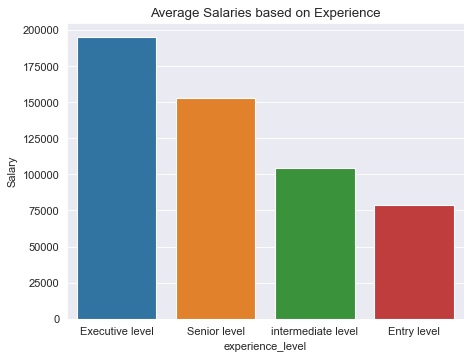

In [19]:
plt.figure(dpi=80)
sns.barplot(x=explvl.index,y=explvl.values)
plt.title("Average Salaries based on Experience")
plt.ylabel('Salary')

In [20]:
empltype=ds_salaries['salary_in_usd'].groupby(by=ds_salaries['employment_type']).mean().sort_values(
    ascending=False)

Text(0, 0.5, 'Salary')

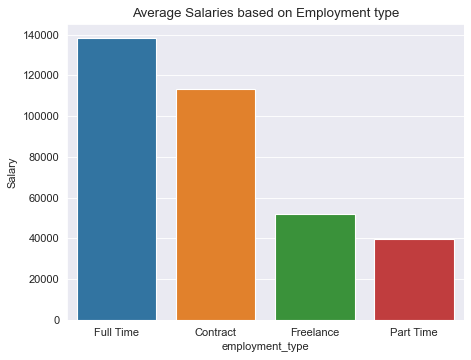

In [21]:
plt.figure(dpi=80)
sns.barplot(x=empltype.index,y=empltype.values)
plt.title("Average Salaries based on Employment type")
plt.ylabel('Salary')

In [22]:
remote_rat=ds_salaries['salary_in_usd'].groupby(by=ds_salaries['remote_ratio']).mean().sort_values(
    ascending=False)

Text(0.5, 0, 'remote_ratio %')

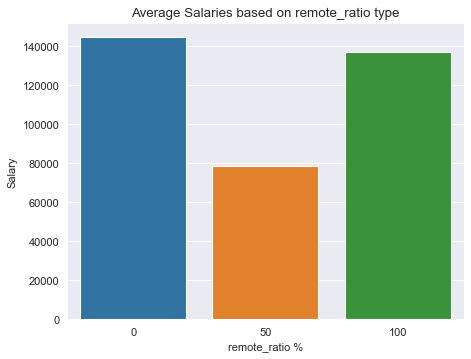

In [23]:
plt.figure(dpi=80)
sns.barplot(x=remote_rat.index,y=remote_rat.values)
plt.title("Average Salaries based on remote_ratio type")
plt.ylabel('Salary')
plt.xlabel('remote_ratio %')

In [24]:
ds_salaries['salary_in_usd'].groupby(by=ds_salaries['company_location']).mean().sort_values(ascending=False)

company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
RU    140333.333333
CA    131917.689655
          ...      
VN     12000.000000
AL     10000.000000
MA     10000.000000
BO      7500.000000
MK      6304.000000
Name: salary_in_usd, Length: 72, dtype: float64

In [25]:
ds_salaries[ds_salaries['salary_in_usd']>200000]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5,2023,Senior level,Full Time,Applied Scientist,222200,USD,222200,US,0,US,L
7,2023,Senior level,Full Time,Data Scientist,219000,USD,219000,CA,0,CA,M
13,2023,Entry level,Full Time,Applied Scientist,213660,USD,213660,US,0,US,L
21,2023,Senior level,Full Time,Research Engineer,275000,USD,275000,DE,0,DE,M
23,2023,Senior level,Full Time,Analytics Engineer,230000,USD,230000,GB,100,GB,M
...,...,...,...,...,...,...,...,...,...,...,...
3676,2021,Senior level,Full Time,Machine Learning Scientist,225000,USD,225000,US,100,CA,L
3697,2020,Executive level,Full Time,Director of Data Science,325000,USD,325000,US,100,US,L
3733,2021,Senior level,Full Time,Principal Data Scientist,235000,USD,235000,US,100,US,L
3747,2021,intermediate level,Full Time,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L


In [26]:
comp_size=ds_salaries['salary_in_usd'].groupby(by=ds_salaries['company_size']).mean().sort_values(
    ascending=False)

Text(0, 0.5, 'Salary')

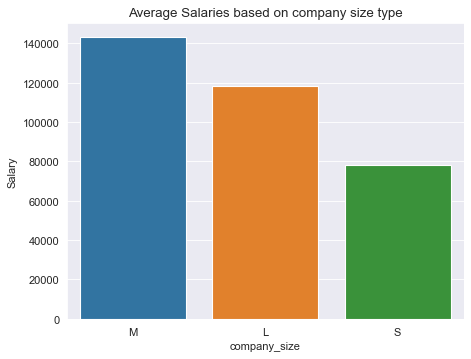

In [27]:
plt.figure(dpi=80)
sns.barplot(x=comp_size.index,y=comp_size.values)
plt.title("Average Salaries based on company size type")
plt.ylabel('Salary')

In [28]:
work_life=ds_salaries['salary_in_usd'].groupby(by=ds_salaries['work_year']).mean()

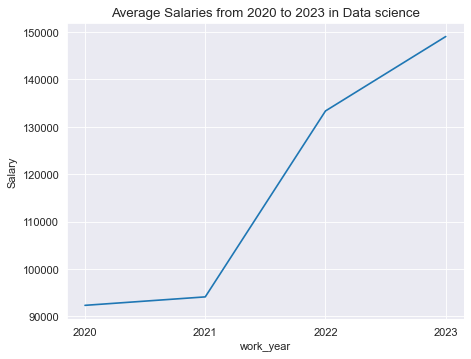

In [29]:
plt.figure(dpi=80)
sns.lineplot(x=work_life.index,y=work_life.values)
plt.title("Average Salaries from 2020 to 2023 in Data science")
plt.ylabel('Salary')
plt.xticks([2020,2021,2022,2023])
plt.show()

### Number of jobs based on experience level employment type, company location and company size

In [30]:
exp_lvl_num = ds_salaries['experience_level'].value_counts()

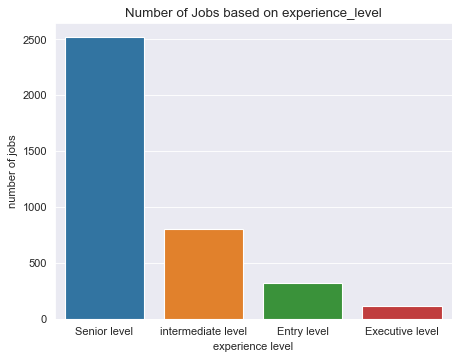

In [31]:
plt.figure(dpi=80)
sns.barplot(x=exp_lvl_num.index,y=exp_lvl_num.values)
plt.title("Number of Jobs based on experience_level")
plt.ylabel('number of jobs')
plt.xlabel('experience level')
plt.show()

In [32]:
emp_typ_num = ds_salaries['employment_type'].value_counts()

In [33]:
emp_typ_num

Full Time    3718
Part Time      17
Contract       10
Freelance      10
Name: employment_type, dtype: int64

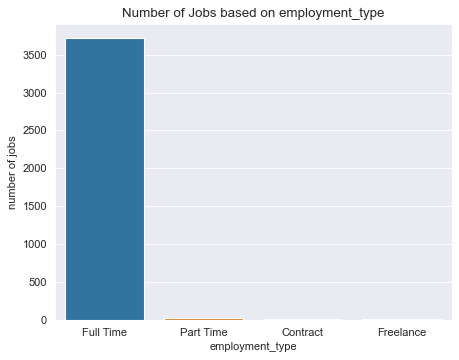

In [34]:
plt.figure(dpi=80)
sns.barplot(x=emp_typ_num.index,y=emp_typ_num.values)
plt.title("Number of Jobs based on employment_type")
plt.ylabel('number of jobs')
plt.xlabel('employment_type')
plt.show()

In [35]:
compsize_num = ds_salaries['company_size'].value_counts()

In [36]:
compsize_num

M    3153
L     454
S     148
Name: company_size, dtype: int64

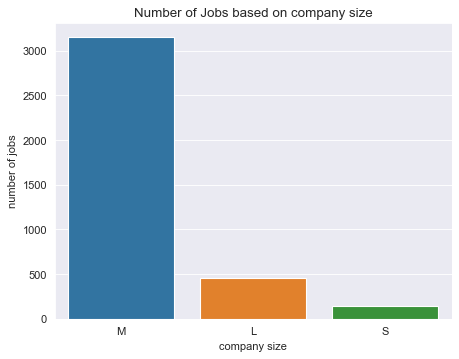

In [37]:
plt.figure(dpi=80)
sns.barplot(x=compsize_num.index,y=compsize_num.values)
plt.title("Number of Jobs based on company size")
plt.ylabel('number of jobs')
plt.xlabel('company size')
plt.show()

In [38]:
comploc_num = ds_salaries['company_location'].value_counts()

In [39]:
comploc_num

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [40]:
workyear_num = ds_salaries['work_year'].value_counts()
workyear_num

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

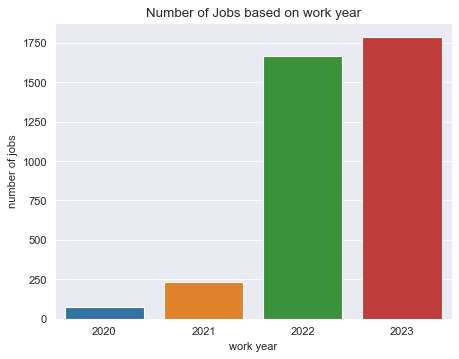

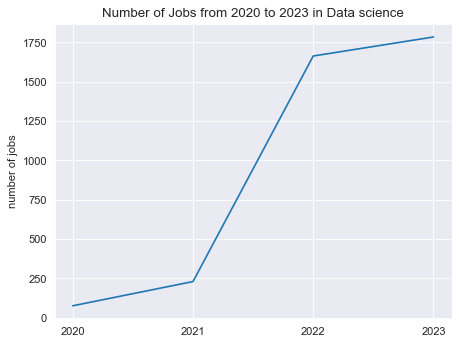

In [41]:
plt.figure(dpi=80)
sns.barplot(x=workyear_num.index,y=workyear_num.values)
plt.title("Number of Jobs based on work year")
plt.ylabel('number of jobs')
plt.xlabel('work year')
plt.show()

plt.figure(dpi=80)
sns.lineplot(x=workyear_num.index,y=workyear_num.values)
plt.title("Number of Jobs from 2020 to 2023 in Data science")
plt.ylabel('number of jobs')
plt.xticks([2020,2021,2022,2023])
plt.show()

In [42]:
ds_salaries.groupby(['experience_level','employment_type','work_year']).mean()

salary  salary_in_usd  \
experience_level   employment_type work_year                                
Entry level        Contract        2020       1.000000e+05  100000.000000   
                                   2022       2.900000e+04   30469.000000   
                   Freelance       2022       7.500000e+04   75000.000000   
                   Full Time       2020       4.323600e+05   59256.600000   
                                   2021       3.016603e+05   58755.060000   
                                   2022       1.727015e+05   77924.678261   
                                   2023       1.330137e+05   95946.401709   
                   Part Time       2020       1.650000e+04   18817.500000   
                                   2021       6.655200e+04   16407.200000   
                                   2022       6.762067e+04   67823.333333   
                                   2023       7.800000e+04   17779.000000   
Executive level    Contract        2021       4.160000e+05  416000.000000   
                   Full Time       2020       1.366667e+05  139944.333333   
                                   2021       1.521111e+05  160586.666667   
                                   2022       3.358311e+05  188260.292683   
                                   2023       2.028563e+05  203705.683333   
Senior level       Contract        2021       1.050000e+05  105000.000000   
                                   2022       9.000000e+04   90000.000000   
                   Freelance       2020       6.000000e+04   60000.000000   
                                   2023       5.000000e+04   50000.000000   
                   Full Time       2020       1.793647e+05  141784.058824   
                                   2021       4.667725e+05  126378.208333   
                                   2022       1.604712e+05  147710.400176   
                                   2023       1.621600e+05  159739.463813   
intermediate level Contract        2021       2.700000e+05  270000.000000   
                                   2022       3.375000e+04   33750.000000   
                                   2023       2.775000e+04   27750.000000   
                   Freelance       2021       2.585167e+04   25851.666667   
                                   2022       1.250000e+06   65261.500000   
                   Full Time       2020       5.332315e+05   87564.718750   
                                   2021       8.539256e+05   82930.848837   
                                   2022       1.569743e+05  102024.620787   
                                   2023       1.570372e+05  116854.500000   
                   Part Time       2021       2.295000e+05   37575.000000   
                                   2022       5.000000e+04   52533.000000   

                                              remote_ratio  
experience_level   employment_type work_year                
Entry level        Contract        2020         100.000000  
                                   2022         100.000000  
                   Freelance       2022         100.000000  
                   Full Time       2020          67.500000  
                                   2021          69.000000  
                                   2022          59.565217  
                                   2023          38.461538  
                   Part Time       2020          75.000000  
                                   2021          70.000000  
                                   2022          83.333333  
                                   2023         100.000000  
Executive level    Contract        2021         100.000000  
                   Full Time       2020          50.000000  
                                   2021          55.555556  
                                   2022          71.951220  
                                   2023          30.000000  
Senior level       Contract        2021         100.000000  
                                   2022    

#### Summary of average full time salaries in 2023 based on experience level

- For full time Entry level positions in data science field it was seem that the mean salary in 2023 was $95,946

- For full time intermediate level positions in data science field it was seem that the mean salary in 2023 was $116,854

- For full time senior level positions in data science field it was seem that the mean salary in 2023 was $159,739

- For full time Execute level positions in data science field it was seem that the mean salary in 2023 was $203,705

<AxesSubplot:>

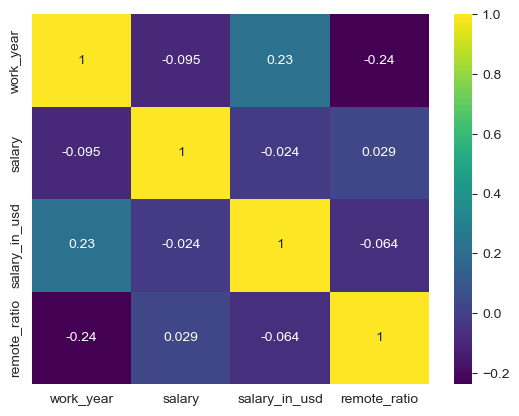

In [43]:
sns.heatmap(ds_salaries.corr(),cmap='viridis',annot=True)

#### Confusion matrix shows a weak positive correlation btw salary in usd to work year 

### MACHINE LEARNING 

In [44]:
ds_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior level,Full Time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,intermediate level,Contract,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,intermediate level,Contract,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,Senior level,Full Time,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,Senior level,Full Time,Data Scientist,120000,USD,120000,CA,100,CA,M


In [45]:
ds_salaries.drop(columns=['remote_ratio','salary','salary_currency','employee_residence','job_title','company_location'],inplace=True)

In [46]:
cat_cols = ds_salaries.select_dtypes(include='object').columns
num_cols = ds_salaries.select_dtypes(exclude='object').columns

In [47]:
cat_cols

Index(['experience_level', 'employment_type', 'company_size'], dtype='object')

In [48]:
num_cols

Index(['work_year', 'salary_in_usd'], dtype='object')

In [49]:
dummy_df = ds_salaries[num_cols]
for col in cat_cols:
    temp_df = pd.get_dummies(ds_salaries[col],drop_first=True)
    dummy_df = pd.concat([dummy_df,temp_df],axis=1)
dummy_df.head()

,work_year,salary_in_usd,Executive level,Senior level,intermediate level,Freelance,Full Time,Part Time,M,S
0,2023,85847,0,1,0,0,1,0,0,0
1,2023,30000,0,0,1,0,0,0,0,1
2,2023,25500,0,0,1,0,0,0,0,1
3,2023,175000,0,1,0,0,1,0,1,0
4,2023,120000,0,1,0,0,1,0,1,0


#### we will convert work year to a dummy column as it is some what a category 

In [50]:
year_dummy = pd.get_dummies(ds_salaries['work_year'],drop_first=True)
dummy_df = pd.concat([dummy_df,year_dummy],axis=1)
dummy_df.drop(columns='work_year',inplace=True)
dummy_df.head()

,salary_in_usd,Executive level,Senior level,intermediate level,Freelance,Full Time,Part Time,M,S,2021,2022,2023
0,85847,0,1,0,0,1,0,0,0,0,0,1
1,30000,0,0,1,0,0,0,0,1,0,0,1
2,25500,0,0,1,0,0,0,0,1,0,0,1
3,175000,0,1,0,0,1,0,1,0,0,0,1
4,120000,0,1,0,0,1,0,1,0,0,0,1


In [51]:
dummy_df = dummy_df.rename(columns={2021: '2021', 2022: '2022',2023:'2023'})

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [53]:
X = dummy_df.drop(columns=['salary_in_usd'])
y = dummy_df['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [54]:
lmodel = LinearRegression()

In [55]:
lmodel.fit(X_train,y_train)

LinearRegression()

In [56]:
pred_data = lmodel.predict(X_test)

### Evaluations 

Text(0, 0.5, 'Predictions')

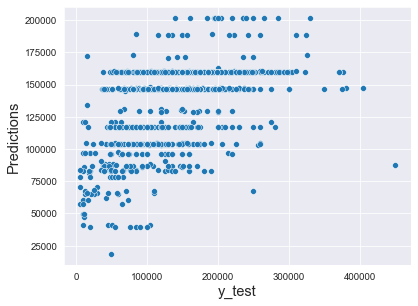

In [57]:
plt.figure(dpi=70)
g=sns.scatterplot(x=y_test,y=pred_data)
g.set_xlabel('y_test',fontdict={'size':15})
g.set_ylabel('Predictions',fontdict={'size':15})

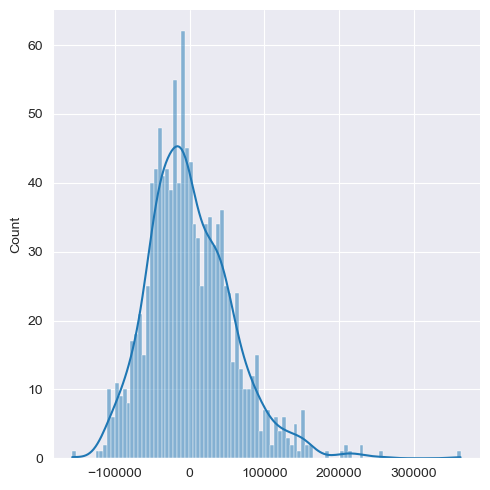

In [58]:
sns.displot(y_test.values-pred_data,bins=100,kde=True,)

In [59]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test,pred_data)

MSE = metrics.mean_squared_error(y_test,pred_data)

RMSE = np.sqrt(MSE)

R2 = metrics.r2_score(y_test,pred_data)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R^2: {R2}')

MAE: 43962.93325598066
MSE: 3280639216.534027
RMSE: 57276.86458365216
R^2: 0.22654454923480694


In [60]:
## Poor model because we have poor predictors for salary